In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib
import json


In [2]:
df1 = pd.read_csv("data_set/Australian Vehicle Prices.csv")
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

## Feature Preparation

#### Defining EngineCapacity Feature

In [4]:
def get_engine_capacity(x):
    try:
        tokens = x.split(' ')
        return float(tokens[2])*1000
    except:
        return ''

In [5]:
df1['EngineCapacity'] = df1['Engine'].apply(get_engine_capacity)
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCapacity
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,2200.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,1500.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,2000.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,5500.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,1300.0


#### Defining Cylinders Feature

In [6]:
def get_cylinders(x):
    try:
        tokens = x.split(' ')
        return int(tokens[0])
    except:
        return ''

In [7]:
df1['Cylinders'] = df1['CylindersinEngine'].apply(get_cylinders)
df1.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCapacity,Cylinders
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990,2200.0,4
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990,1500.0,4
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,...,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988,2000.0,4
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,...,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990,5500.0,8
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,...,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990,1300.0,4


#### Droping &Renaming Features

In [8]:
df2 = df1[['Brand', 'Year', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType', 'EngineCapacity', 'Cylinders', 'Kilometres', 'Price']]
df2.rename(columns={'UsedOrNew':'Condition', 'Kilometres':'Mileage'},inplace=True)
df2

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\677268783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'UsedOrNew':'Condition', 'Kilometres':'Mileage'},inplace=True)


,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
0,Ssangyong,2022.0,DEMO,Automatic,AWD,Diesel,SUV,2200.0,4,5595,51990
1,MG,2022.0,USED,Automatic,Front,Premium,Hatchback,1500.0,4,16,19990
2,BMW,2022.0,USED,Automatic,Rear,Premium,Coupe,2000.0,4,8472,108988
3,Mercedes-Benz,2011.0,USED,Automatic,Rear,Premium,Coupe,5500.0,8,136517,32990
4,Renault,2022.0,USED,Automatic,Front,Unleaded,SUV,1300.0,4,1035,34990
...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,USED,Automatic,Front,Unleaded,Commercial,,,66000,29500
16730,Mercedes-Benz,2012.0,USED,Automatic,Rear,Diesel,NaN,,,117432,39888
16731,Suzuki,2022.0,DEMO,Automatic,Front,Unleaded,SUV,1600.0,4,5165,35280
16732,Mercedes-Benz,2016.0,USED,Automatic,AWD,Premium,SUV,2000.0,4,85525,41888


## Data Cleaning

In [9]:
# Remove duplicates
df2.drop_duplicates(inplace=True)
df2

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\565958481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
0,Ssangyong,2022.0,DEMO,Automatic,AWD,Diesel,SUV,2200.0,4,5595,51990
1,MG,2022.0,USED,Automatic,Front,Premium,Hatchback,1500.0,4,16,19990
2,BMW,2022.0,USED,Automatic,Rear,Premium,Coupe,2000.0,4,8472,108988
3,Mercedes-Benz,2011.0,USED,Automatic,Rear,Premium,Coupe,5500.0,8,136517,32990
4,Renault,2022.0,USED,Automatic,Front,Unleaded,SUV,1300.0,4,1035,34990
...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014.0,USED,Automatic,Front,Unleaded,Commercial,,,66000,29500
16730,Mercedes-Benz,2012.0,USED,Automatic,Rear,Diesel,NaN,,,117432,39888
16731,Suzuki,2022.0,DEMO,Automatic,Front,Unleaded,SUV,1600.0,4,5165,35280
16732,Mercedes-Benz,2016.0,USED,Automatic,AWD,Premium,SUV,2000.0,4,85525,41888


#### Brand

In [10]:
df2['Brand'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Mercedes-Benz', 'Renault', 'Toyota',
       'Land', 'Nissan', 'Honda', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'Hyundai', 'Jeep', 'Volvo', 'Mazda', 'Abarth', 'Holden',
       'Audi', 'Kia', 'Mini', 'Peugeot', 'Suzuki', 'Dodge', 'Porsche',
       'Daihatsu', 'Isuzu', 'Lexus', 'Jaguar', 'Rolls-Royce', 'Skoda',
       'Fiat', 'Haval', 'Citroen', 'LDV', 'HSV', 'Foton', 'Mahindra',
       'Maserati', 'Alfa', 'GWM', 'Ram', 'Tesla', 'Genesis', 'Chrysler',
       'Great', 'Opel', 'Saab', 'Bentley', 'Rover', nan, 'Ferrari',
       'Cupra', 'Chevrolet', 'Lamborghini', 'FPV', 'McLaren', 'Chery',
       'Iveco', 'Hummer', 'Infiniti', 'BYD', 'Tata', 'Aston', 'Daewoo',
       'Proton', 'Geely', 'Smart', 'Ineos', 'Caterham', 'Hino',
       'International', 'Lotus', 'Polestar', 'Datsun', 'Packard'],
      dtype=object)

In [11]:
# check brands with less than 100 cars

brand_count = df2.groupby('Brand')['Brand'].agg('count')
brands_less_than_100_cars = brand_count[brand_count<100]
brands_less_than_100_cars


Brand
Abarth            3
Alfa             14
Aston             5
BYD               3
Bentley          12
Caterham          2
Chery            10
Chevrolet        13
Chrysler         26
Citroen          15
Cupra             8
Daewoo            1
Daihatsu         11
Datsun            1
Dodge            13
FPV               5
Ferrari           8
Fiat             36
Foton             4
Geely             1
Genesis          14
Great            16
HSV              44
Haval            22
Hino             26
Hummer            1
Ineos             3
Infiniti          3
International     2
Iveco            37
Jaguar           51
Lamborghini       2
Lotus             3
Mahindra         12
Maserati         16
McLaren           7
Mini             83
Opel              4
Packard           1
Peugeot          59
Polestar          1
Porsche          97
Proton            1
Ram              33
Rolls-Royce       1
Rover             3
Saab              2
Smart             1
Ssangyong        54
Tata          

In [12]:
# replace brands with less than 100 cars as a missing value

df2['Brand'] = df2['Brand'].apply(lambda x: np.nan if x in brands_less_than_100_cars else x)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\4146312331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Brand'] = df2['Brand'].apply(lambda x: np.nan if x in brands_less_than_100_cars else x)


In [13]:
# Check missing values
df2['Brand'].isnull().sum()

808

In [14]:
# Drop missing values
df2.dropna(subset = 'Brand', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\3238925416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset = 'Brand', inplace=True)


#### Year

In [15]:
df2['Year'].unique()

array([2022., 2011., 2004., 2017., 2000., 2013., 2014., 2009., 2018.,
       2015., 2016., 2012., 2023., 2005., 2019., 2021., 2007., 2010.,
       2003., 2008., 2006., 2020., 1999., 2002., 1995., 1997., 1993.,
       2001., 1998., 1996., 1994., 1989., 1990., 1981., 1991., 1985.,
       1970., 1984., 1975., 1992.])

In [16]:
# Check missing values
df2['Year'].isnull().sum()

0

In [17]:
# Convert the data type
df2['Year'] = df2['Year'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2713083214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].astype(int)


#### Condition

In [18]:
df2['Condition'].unique()

array(['USED', 'NEW', 'DEMO'], dtype=object)

In [19]:
# Check missing values
df2['Condition'].isnull().sum()

0

In [20]:
# Drop values which Condition = DEMO 
df2.drop(df2[df2['Condition']=='DEMO'].index, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1231395166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['Condition']=='DEMO'].index, inplace=True)


#### Transmission

In [21]:
df2['Transmission'].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [22]:
# Replace missing values with NaN
df2['Transmission'].replace('-',np.nan,inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2568074160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Transmission'].replace('-',np.nan,inplace=True)


In [23]:
# Check missing values
df2['Transmission'].isnull().sum()

196

In [24]:
# Drop missing values
df2.dropna(subset='Transmission', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1152171599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='Transmission', inplace=True)


#### DriveType

In [25]:
df2['DriveType'].unique()

array(['Front', 'Rear', 'Other', 'AWD', '4WD'], dtype=object)

In [26]:
# Check missing values
df2['DriveType'].isnull().sum()

0

#### FuelType

In [27]:
df2['FuelType'].unique()

array(['Premium', 'Unleaded', 'Diesel', 'Hybrid', '-', 'Other',
       'Electric', 'LPG', 'Leaded'], dtype=object)

In [28]:
# Replace missing values with NaN
df2['FuelType'].replace('-',np.nan,inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2249803138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FuelType'].replace('-',np.nan,inplace=True)


In [29]:
# Check missing values
df2['FuelType'].isnull().sum()

417

In [30]:
# Drop missing values
df2.dropna(subset='FuelType', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1620605757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='FuelType', inplace=True)


#### BodyType

In [31]:
df2['BodyType'].unique()

array(['Hatchback', 'Coupe', 'SUV', 'Commercial', nan, 'Ute / Tray',
       'Sedan', 'Wagon', 'People Mover', 'Convertible', 'Other'],
      dtype=object)

In [32]:
# Replace Ute / Tray values with Ute Tray
df2['BodyType'].replace('Ute / Tray','Ute Tray',inplace=True)

# Replace missing values with NaN
df2['BodyType'].replace('-', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1062915734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BodyType'].replace('Ute / Tray','Ute Tray',inplace=True)
C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1062915734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BodyType'].replace('-', np.nan, inplace=True)


In [33]:
# Check missing values
df2['BodyType'].isnull().sum()

144

In [34]:
# Drop missing values
df2.dropna(subset='BodyType', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1828642278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='BodyType', inplace=True)


#### EngineCapacity

In [35]:
df2['EngineCapacity'].unique()

array([1500.0, 2000.0, 5500.0, 1300.0, '', 1600.0, 2700.0, 3000.0, 1400.0,
       1000.0, 2400.0, 2500.0, 1200.0, 1800.0, 4000.0, 3500.0, 2200.0,
       3200.0, 6000.0, 2300.0, 4100.0, 3600.0, 3300.0, 4200.0, 2800.0,
       4500.0, 3700.0, 2100.0, 4400.0, 5000.0, 1900.0, 4700.0, 1700.0,
       4600.0, 3800.0, 2900.0, 5400.0, 6200.0, 5600.0, 5700.0, 4900.0,
       7300.0, 3100.0, 2600.0, 4800.0, 3400.0, 4300.0, 6400.0, 7800.0,
       9800.0, 5200.0, 3900.0], dtype=object)

In [36]:
# Replace missing values with NaN
df2['EngineCapacity'].replace('', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1148236047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EngineCapacity'].replace('', np.nan, inplace=True)


In [37]:
# Check missing values
df2['EngineCapacity'].isnull().sum()

979

In [38]:
# Drop missing values
df2.dropna(subset='EngineCapacity', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\411694984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='EngineCapacity', inplace=True)


In [39]:
# Convert the data type
df2['EngineCapacity'] = df2['EngineCapacity'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\3883482411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EngineCapacity'] = df2['EngineCapacity'].astype(int)


#### Cylinders

In [40]:
df2['Cylinders'].unique()

array([4, 8, 3, 6, 5, 12, 2, 10], dtype=object)

In [41]:
# check missing values
df2['Cylinders'].isnull().sum()

0

In [42]:
# Convert the data type
df2['Cylinders'] = df2['Cylinders'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\3363290256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cylinders'] = df2['Cylinders'].astype(int)


#### Mileage

In [43]:
df2[(df2['Mileage']=='-') | (df2['Mileage']=='- / -')]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
2250,Volkswagen,2023,NEW,Automatic,AWD,Premium,SUV,2000,4,-,85990
2431,Renault,2023,NEW,Automatic,Front,Unleaded,SUV,2500,4,-,46888
2686,Volkswagen,2022,NEW,Automatic,AWD,Premium,Wagon,2000,4,-,68990
2738,Volkswagen,2022,NEW,Automatic,AWD,Premium,SUV,2000,4,-,52490
3002,Volkswagen,2023,NEW,Automatic,AWD,Premium,Wagon,2000,4,-,74990
...,...,...,...,...,...,...,...,...,...,...,...
16603,Mazda,2023,NEW,Automatic,Front,Unleaded,SUV,2500,4,-,60376
16629,Suzuki,2022,NEW,Manual,Front,Unleaded,Hatchback,1400,4,-,34690
16642,Suzuki,2022,NEW,Automatic,Front,Premium,SUV,1200,4,-,24485
16651,Suzuki,2022,NEW,Automatic,Front,Unleaded,Hatchback,1200,4,-,27690


In [44]:
# Replace missing values with NaN
df2['Mileage'].replace(['-', '- / -'], np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\3340717015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'].replace(['-', '- / -'], np.nan, inplace=True)


In [45]:
# Assign 0 for Mileage when Condition is NEW
df2['Mileage'] = df2.apply(lambda x: 0 if x['Condition'] == 'NEW' else x['Mileage'], axis=1)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1717817696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2.apply(lambda x: 0 if x['Condition'] == 'NEW' else x['Mileage'], axis=1)


In [46]:
# Check values with Mileage is missing and Condition = 'USED'
((df2['Mileage'].isnull()) & (df2['Condition']=='USED')).sum()

7

In [47]:
# Drop values with Mileage is missing and Condition = 'USED'
df2.drop(df2[(df2['Mileage'].isnull()) & (df2['Condition']=='USED')].index, axis=0, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\37530964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[(df2['Mileage'].isnull()) & (df2['Condition']=='USED')].index, axis=0, inplace=True)


In [48]:
# Convert data type
df2['Mileage'] = df2['Mileage'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2744635594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mileage'] = df2['Mileage'].astype(int)


#### Price

In [49]:
# Replace missing values with NaN
df2['Price'].replace('POA', np.nan, inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2460696471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'].replace('POA', np.nan, inplace=True)


In [50]:
# Check missing values
(df2['Price'].isnull()).sum()

25

In [51]:
# Drop missing values
df2.dropna(subset='Price', inplace=True)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1359655473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset='Price', inplace=True)


In [52]:
# Convert data type
df2['Price'] = df2['Price'].astype(int)

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\1764676764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df2['Price'].astype(int)


## Outliers Handling

In [53]:
df3 = df2.copy()
df3.head()

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
1,MG,2022,USED,Automatic,Front,Premium,Hatchback,1500,4,16,19990
2,BMW,2022,USED,Automatic,Rear,Premium,Coupe,2000,4,8472,108988
3,Mercedes-Benz,2011,USED,Automatic,Rear,Premium,Coupe,5500,8,136517,32990
4,Renault,2022,USED,Automatic,Front,Unleaded,SUV,1300,4,1035,34990
6,Land,2017,USED,Automatic,AWD,Diesel,SUV,2000,4,67662,62280


In [54]:
# define a function to get the outliers

def detect_outliers(x):
    
    outliers = []
    
    check_list = x.to_numpy()         # get pandas dataframe column to a new list (to avoid the index missing issue)
    
    q1 = np.quantile(check_list, .25)     # first quantile(25%)
    q3 = np.quantile(check_list, .75)     # third quantile(75%)
    
    iqr = q3-q1                       # inter quantile value
    l_bound = q1-iqr*1.5              # lower bound value
    u_bound = q3+iqr*1.5              # uper bound value
    
    for i in range(len(check_list)):
        if (check_list[i] < l_bound or check_list[i] > u_bound):
            outliers.append(check_list[i])
           
    return outliers
    

#### Year

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


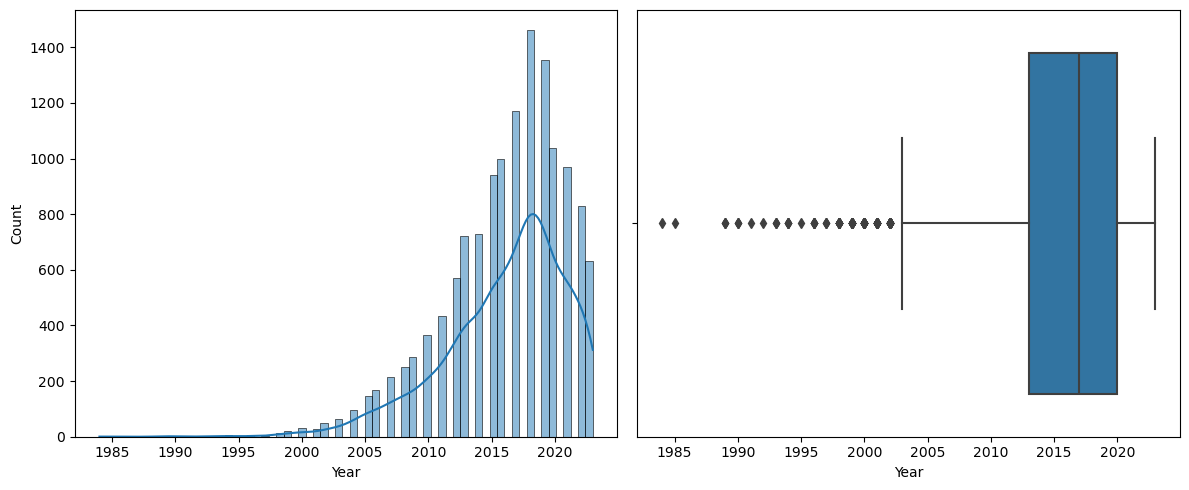

In [55]:
# visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=df3["Year"],kde=True, ax=axes[0])
sns.boxplot(x=df3["Year"], ax=axes[1])

plt.tight_layout()
plt.show()

In [56]:
# Identify outliers
year_outliers = sorted(detect_outliers(df3['Year']))
year_outliers

[1984,
 1985,
 1989,
 1989,
 1989,
 1990,
 1990,
 1990,
 1991,
 1992,
 1993,
 1993,
 1993,
 1994,
 1994,
 1994,
 1994,
 1994,
 1995,
 1996,
 1996,
 1996,
 1996,
 1996,
 1996,
 1997,
 1997,
 1997,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1998,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 1999,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2001,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,
 2002,

In [57]:
# Drop rows where the year is before 2000
df3.drop(df3[df3['Year']<2000].index, inplace=True)

In [58]:
# Remove cars with Condition is NEW and Year < 2020
df3.drop(df3[(df3['Condition']=='NEW') & (df3['Year']<=2020)].index, inplace=True)

<Axes: xlabel='Year'>

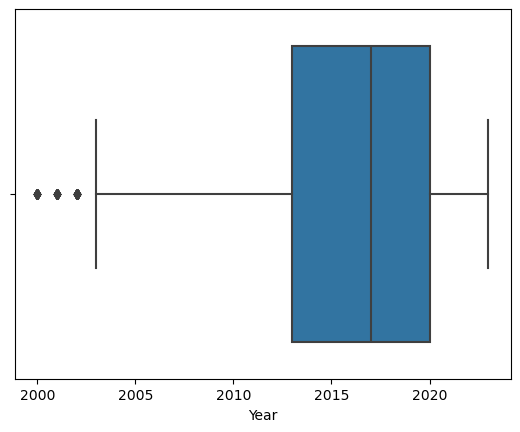

In [59]:
# visualize after dropping outliers
sns.boxplot(x=df3["Year"])

#### EngineCapacity

<Axes: xlabel='EngineCapacity'>

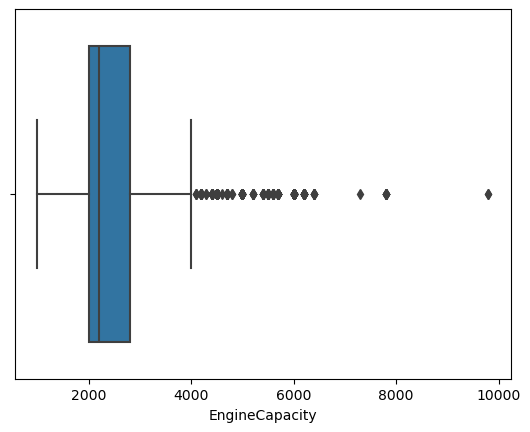

In [60]:
# visualize outliers
sns.boxplot(x=df3['EngineCapacity'])

In [61]:
# rows with EngineCapacity > 7000
df3[df3['EngineCapacity']>7000]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
3794,Ford,2002,USED,Automatic,4WD,Diesel,Ute Tray,7300,8,179999,79900
14922,Isuzu,2023,NEW,Automatic,4WD,Diesel,Ute Tray,7800,6,0,210992
14961,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,9800,6,0,240754
14982,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,184564
15137,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,221527
15145,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,9800,6,0,293131
15179,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,197239
15193,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,7800,6,0,138457
15198,Isuzu,2023,NEW,Manual,Rear,Diesel,Ute Tray,7800,6,0,195100
15328,Isuzu,2023,NEW,Automatic,Rear,Diesel,Ute Tray,7800,6,0,131088


In [62]:
# Remove rows with EngineCapacity > 7000
df3.drop(df3[df3['EngineCapacity']>7000].index, inplace=True)

<Axes: xlabel='EngineCapacity'>

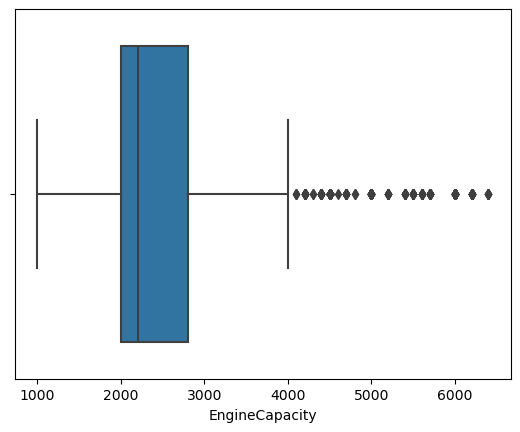

In [63]:
# visualize after dropping outliers
sns.boxplot(x=df3["EngineCapacity"])

#### Cylinders

<Axes: xlabel='Cylinders'>

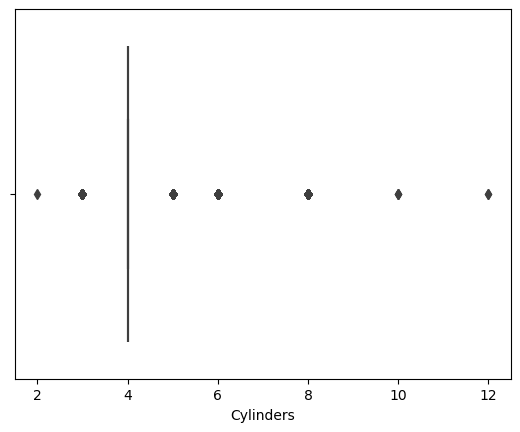

In [64]:
#  Visualize outliers
sns.boxplot(x=df3['Cylinders'])

#### Mileage

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


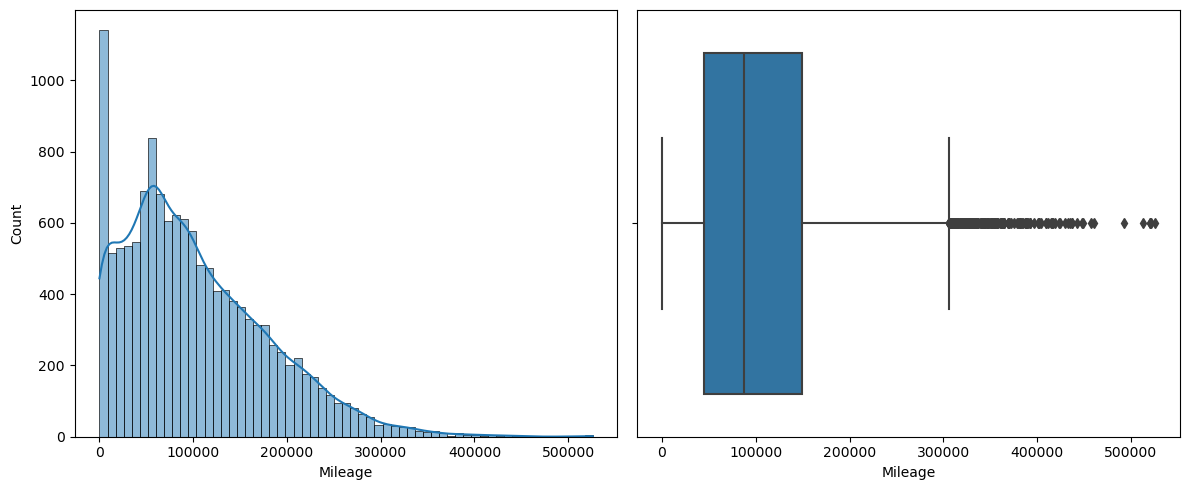

In [65]:
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=df3["Mileage"], kde=True ,ax=axes[0])
sns.boxplot(x=df3["Mileage"], ax=axes[1])

plt.tight_layout()
plt.show()

In [66]:
# rows with Mileage < 20km and Condition = USED
df3[(df3['Mileage']<20) & (df3['Condition']=='USED')]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price
1,MG,2022,USED,Automatic,Front,Premium,Hatchback,1500,4,16,19990
2051,Hyundai,2023,USED,Automatic,Front,Premium,Hatchback,2000,4,19,66990
2780,Hyundai,2022,USED,Manual,Front,Unleaded,Hatchback,1600,4,12,47990
2812,Toyota,2023,USED,Automatic,Front,Hybrid,SUV,2500,4,17,68888
3724,Suzuki,2022,USED,Automatic,4WD,Unleaded,SUV,1500,4,10,46990
3784,Toyota,2023,USED,Automatic,AWD,Hybrid,SUV,2500,4,11,63777
3856,Toyota,2023,USED,Automatic,4WD,Diesel,SUV,3300,6,8,129888
4483,Toyota,2023,USED,Automatic,Front,Unleaded,Hatchback,2000,4,10,37363
4751,Suzuki,2023,USED,Automatic,AWD,Unleaded,SUV,1500,4,15,44990
5256,Hyundai,2023,USED,Manual,Front,Unleaded,SUV,1600,4,18,25990


In [67]:
# Remove rows with Mileage < 50km and Condition = USED
df3.drop(df3[(df3['Mileage']<20) & (df3['Condition']=='USED')].index, inplace=True)

#### Price

C:\Users\DULZZ\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


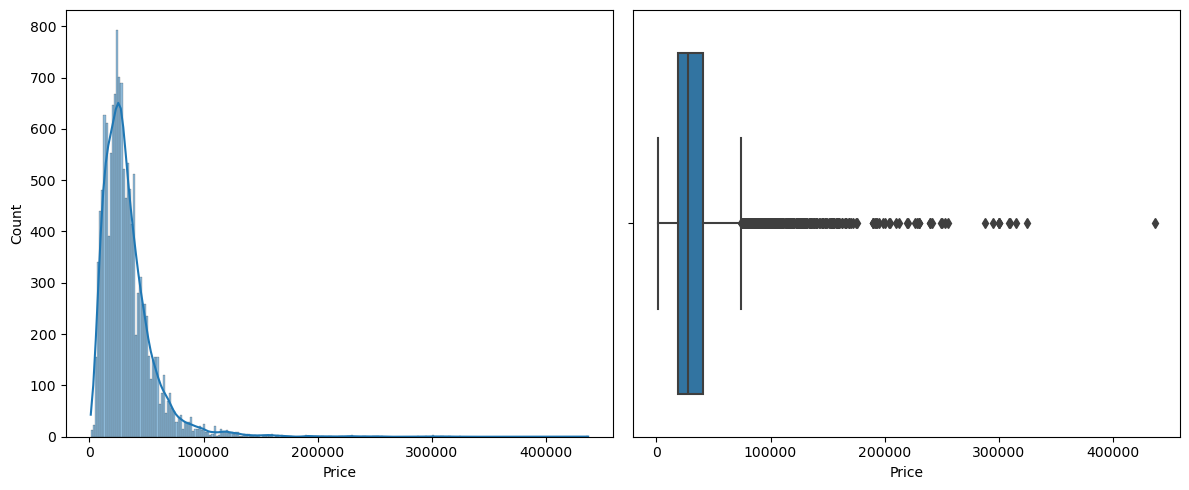

In [68]:
# Visualize outliers

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=df3["Price"], kde=True, ax=axes[0])
sns.boxplot(x=df3["Price"], ax=axes[1])

plt.tight_layout()
plt.show()

In [69]:
# rows with Price < $500
df3[df3['Price']<500]

,Brand,Year,Condition,Transmission,DriveType,FuelType,BodyType,EngineCapacity,Cylinders,Mileage,Price


In [70]:
# Remove rows with Price < $500
df3.drop(df3[df3['Price']<500].index, inplace=True)

#### Brand

<Axes: xlabel='Price', ylabel='Brand'>

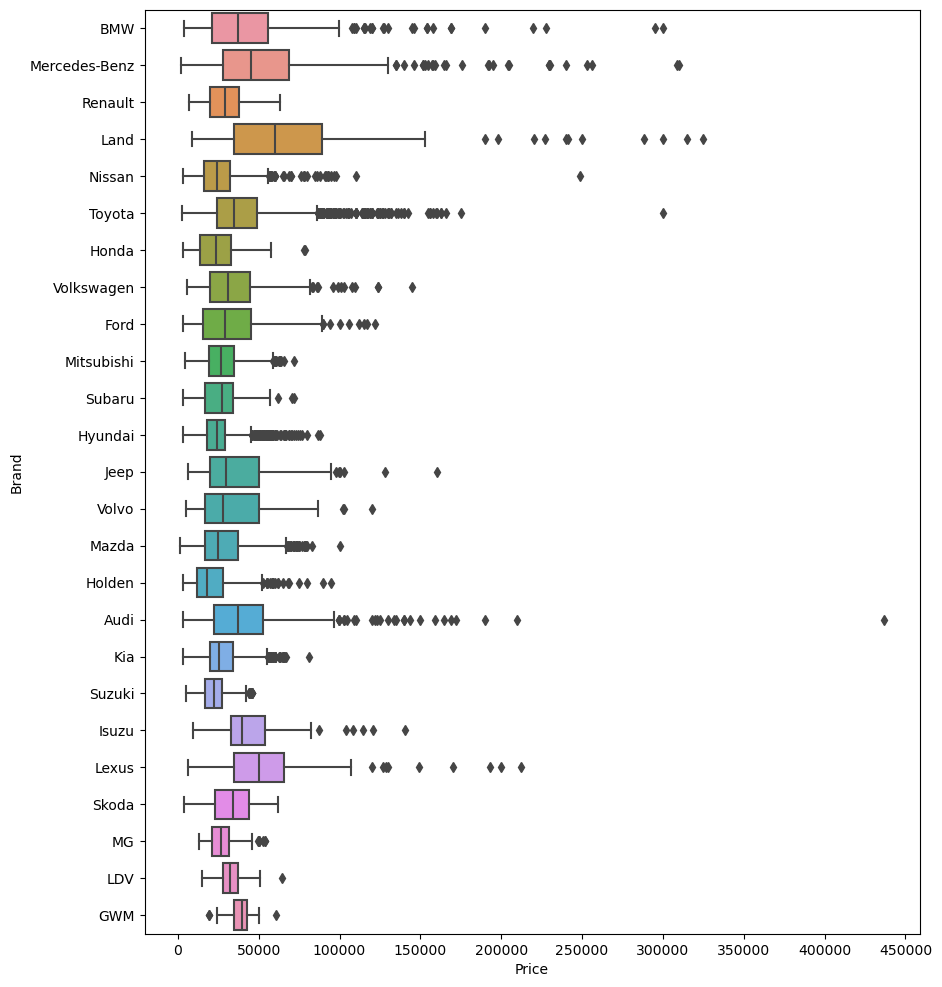

In [71]:
# Visualize outliers
plt.figure(figsize=(10,12))
plt.xticks(range(0, 500000, 50000))
sns.boxplot(data=df3, x='Price', y='Brand')


In [72]:
# define a function for return indexes of the outliers of Brand
# here, values which are not in 3 x interquantile_range supposed as outliers

def brand_outliers():
    
    outlier_index_list = []
    
    
    for i in df3.index:
        
        price_list = df3[df3['Brand']==df3.loc[i]['Brand']]['Price']
        
        
        q1 = np.quantile(price_list, .25)     # first quantile(25%)
        q3 = np.quantile(price_list, .75)     # third quantile(75%)
    
        iqr = q3-q1                    # inter quantile value
        l_bound = q1-iqr*3             # lower bound value
        u_bound = q3+iqr*3             # uper bound value
        
        if (df3.loc[i]['Price'] < l_bound or df3.loc[i]['Price'] > u_bound):
            outlier_index_list.append(i)
    
    return outlier_index_list


brand_outlier_list = brand_outliers() # Apply function
    

In [73]:
# number of outliers
len(brand_outlier_list)

108

In [74]:
# remove outliers
df3.drop(brand_outlier_list, axis=0, inplace=True)

<Axes: xlabel='Price', ylabel='Brand'>

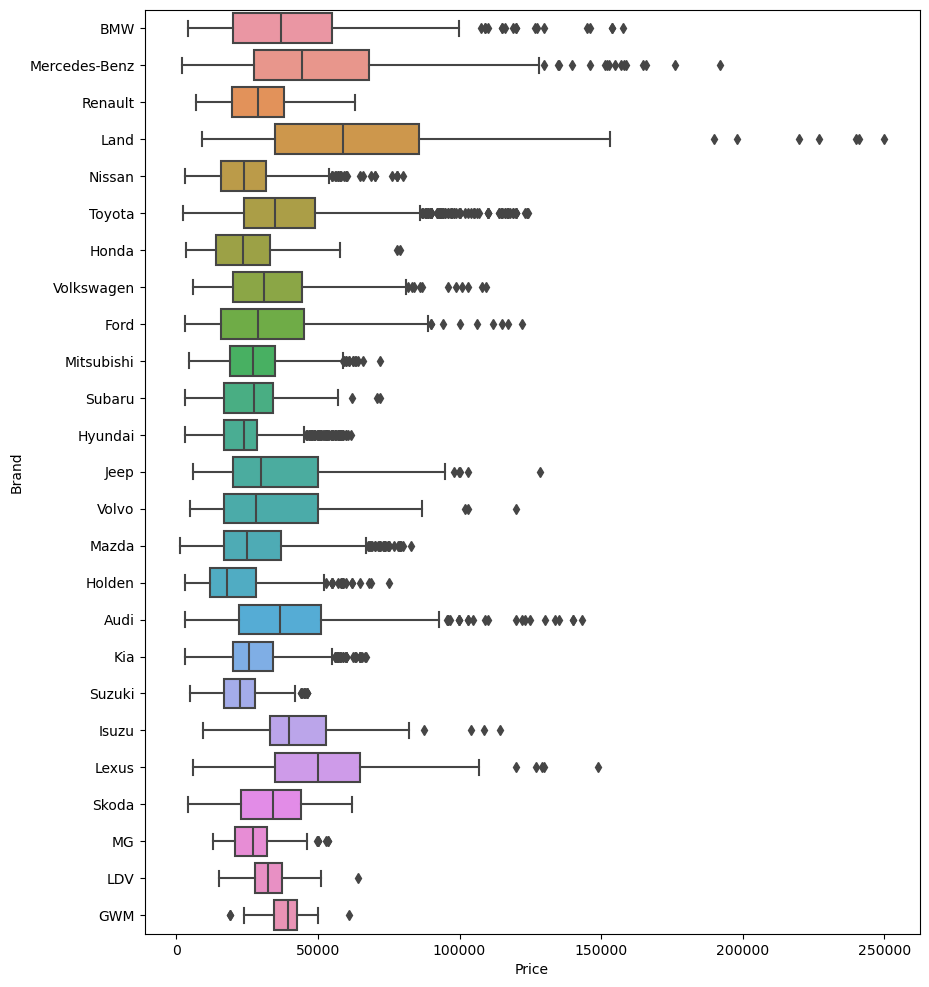

In [75]:
# visualize after dropping outliers
plt.figure(figsize=(10,12))
plt.xticks(range(0, 500000, 50000))
sns.boxplot(data=df3, x='Price', y='Brand')

## Feature Encording

In [76]:
# define seperate data frames for USED and NEW vehicles

df3_used = df3[df3['Condition']=='USED']
df3_used.drop('Condition', axis=1, inplace=True)

df3_new = df3[df3['Condition']=='NEW']
df3_new.drop(['Condition', 'Mileage'], axis=1, inplace=True)

print(df3_new.head())
print(df3_used.head())

           Brand  Year Transmission DriveType  FuelType   BodyType  \
22    Volkswagen  2023    Automatic       AWD    Diesel   Ute Tray   
71    Volkswagen  2023    Automatic       AWD   Premium        SUV   
482           MG  2022    Automatic     Front   Premium  Hatchback   
898        Mazda  2023    Automatic     Front  Unleaded        SUV   
1070       Isuzu  2023    Automatic       4WD    Diesel   Ute Tray   

      EngineCapacity  Cylinders  Price  
22              3000          6  83887  
71              2000          4  56887  
482             1500          4  19490  
898             2000          4  42288  
1070            3000          4  65640  
           Brand  Year Transmission DriveType  FuelType   BodyType  \
2            BMW  2022    Automatic      Rear   Premium      Coupe   
3  Mercedes-Benz  2011    Automatic      Rear   Premium      Coupe   
4        Renault  2022    Automatic     Front  Unleaded        SUV   
6           Land  2017    Automatic       AWD    Dies

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2884069414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_used.drop('Condition', axis=1, inplace=True)
C:\Users\DULZZ\AppData\Local\Temp\ipykernel_6636\2884069414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_new.drop(['Condition', 'Mileage'], axis=1, inplace=True)


In [77]:
# apply one-hot encording for convert categorical features to numerical features

# categotical features
cat_features_used = df3_used.select_dtypes(include=['object'])
cat_features_new = df3_new.select_dtypes(include=['object'])

# define dummy variables (drop_first=True is used to drop one column from dummy variables to avoid multicollinearity issues, that variable can be derived from others)
dummy_features_used = pd.get_dummies(cat_features_used, drop_first=True)
dummy_features_new = pd.get_dummies(cat_features_new, drop_first=True)

# combine categotical and numerical features together
df4_used = pd.concat([df3_used, dummy_features_used], axis=1).drop(cat_features_used.columns, axis=1)
df4_new = pd.concat([df3_new, dummy_features_new], axis=1).drop(cat_features_new.columns, axis=1)

## Model Building & Evaluation

In [78]:
df4_used.head()

,Year,EngineCapacity,Cylinders,Mileage,Price,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
2,2022,2000,4,8472,108988,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,5500,8,136517,32990,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2022,1300,4,1035,34990,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
6,2017,2000,4,67662,62280,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,2000,1600,4,300539,2995,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [79]:
df4_new.head()

,Year,EngineCapacity,Cylinders,Price,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Honda,Brand_Hyundai,Brand_Isuzu,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
22,2023,3000,6,83887,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
71,2023,2000,4,56887,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
482,2022,1500,4,19490,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
898,2023,2000,4,42288,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1070,2023,3000,4,65640,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [80]:
# Define independent(x) and dependent(y) variables

X_used = df4_used.drop('Price', axis=1)
y_used = df4_used['Price']

X_new = df4_new.drop('Price', axis=1)
y_new = df4_new['Price']

In [81]:
X_train_used, X_test_used, y_train_used, y_test_used = train_test_split(X_used, y_used, test_size=0.2, random_state=12)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=12)

#### Feature Scaling

In [82]:
# Apply scaling to numerical features

scaler_used = StandardScaler()
X_train_used[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']] = scaler_used.fit_transform(X_train_used[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']])
X_test_used[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']] = scaler_used.transform(X_test_used[['Year', 'EngineCapacity', 'Cylinders', 'Mileage']])

scaler_new = StandardScaler()
X_train_new[['Year', 'EngineCapacity', 'Cylinders']] = scaler_new.fit_transform(X_train_new[['Year', 'EngineCapacity', 'Cylinders']])
X_test_new[['Year', 'EngineCapacity', 'Cylinders']] = scaler_new.transform(X_test_new[['Year', 'EngineCapacity', 'Cylinders']])

In [83]:
pd.DataFrame(X_train_used, columns=X_used.columns) # X_train_used data after scaling

,Year,EngineCapacity,Cylinders,Mileage,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Holden,Brand_Honda,Brand_Hyundai,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
7623,0.939196,-0.496544,-0.430570,-0.573848,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
420,0.051563,0.972252,0.584338,1.558713,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
15599,0.051563,0.972252,0.584338,-0.036216,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7482,0.495379,-0.496544,-0.430570,-0.618151,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
7701,0.939196,-0.741343,-0.430570,-0.711082,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,-0.392254,-0.251745,-0.430570,-0.198262,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9176,-1.501795,0.605053,-0.430570,0.968871,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4224,0.939196,-0.496544,-0.430570,-0.700427,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
11991,-0.614162,1.339452,1.599245,0.800363,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [84]:
pd.DataFrame(X_train_new, columns=X_new.columns) # X_train_new data after scaling

,Year,EngineCapacity,Cylinders,Brand_BMW,Brand_Ford,Brand_GWM,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jeep,...,FuelType_Unleaded,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute Tray,BodyType_Wagon
5652,-1.539760,-0.234616,-0.200087,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16604,0.649452,-0.954878,-0.200087,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
11578,-1.539760,-1.242983,-1.697793,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
15225,0.649452,1.205908,2.795327,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9402,-1.539760,-0.234616,-0.200087,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,0.649452,0.341594,-0.200087,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11743,-1.539760,-0.234616,-0.200087,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
11349,-1.539760,-0.234616,-0.200087,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
11605,0.649452,-0.954878,-0.200087,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### Linear Regression Model

In [85]:
lr_model_used = LinearRegression()
lr_model_used.fit(X_train_used, y_train_used)

lr_model_new = LinearRegression()
lr_model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [86]:
# Prediction result & score

y_pred_lr_used = lr_model_used.predict(X_test_used)
y_pred_lr_new = lr_model_new.predict(X_test_new)

model_result = {'model_used': {
    'Mean_Squared_Error' : mean_squared_error(y_test_used, y_pred_lr_used),
    'mean_Absolute_Error' : mean_absolute_error(y_test_used, y_pred_lr_used),
    'R2_Score' : r2_score(y_test_used, y_pred_lr_used),
    'Accuracy' : str(round(r2_score(y_test_used, y_pred_lr_used)*100)) + ' %' 
    },
    'model_new': {
    'Mean_Squared_Error' : mean_squared_error(y_test_new, y_pred_lr_new),
    'mean_Absolute_Error' : mean_absolute_error(y_test_new, y_pred_lr_new),
    'R2_Score' : r2_score(y_test_new, y_pred_lr_new),
    'Accuracy' : str(round(r2_score(y_test_new, y_pred_lr_new)*100)) + ' %' 
    }
}

pd.DataFrame(model_result)

,model_used,model_new
Mean_Squared_Error,97124581.695237,249272502.984779
mean_Absolute_Error,6888.625004,9591.504715
R2_Score,0.735573,0.564487
Accuracy,74 %,56 %


#### Random Forest Regression Model

In [87]:
rfr_model_used = RandomForestRegressor()
rfr_model_used.fit(X_train_used, y_train_used)

rfr_model_new = RandomForestRegressor()
rfr_model_new.fit(X_train_new, y_train_new)

RandomForestRegressor()

In [88]:
# Prediction result & score

y_pred_rfr_used = rfr_model_used.predict(X_test_used)
y_pred_rfr_new = rfr_model_new.predict(X_test_new)

model_result = {'model_used': {
    'Mean_Squared_Error' : mean_squared_error(y_test_used, y_pred_rfr_used),
    'mean_Absolute_Error' : mean_absolute_error(y_test_used, y_pred_rfr_used),
    'R2_Score' : r2_score(y_test_used, y_pred_rfr_used),
    'Accuracy' : str(round(r2_score(y_test_used, y_pred_rfr_used)*100)) + ' %' 
    },
    'model_new': {
    'Mean_Squared_Error' : mean_squared_error(y_test_new, y_pred_rfr_new),
    'mean_Absolute_Error' : mean_absolute_error(y_test_new, y_pred_rfr_new),
    'R2_Score' : r2_score(y_test_new, y_pred_rfr_new),
    'Accuracy' : str(round(r2_score(y_test_new, y_pred_rfr_new)*100)) + ' %' 
    }
}

pd.DataFrame(model_result)

,model_used,model_new
Mean_Squared_Error,36519039.896951,200719802.168039
mean_Absolute_Error,3997.113898,8476.91132
R2_Score,0.900575,0.649315
Accuracy,90 %,65 %


#### The Random Forest Regression model performs better than the Linear Regression model.
use this model for predict price of used cars

In [90]:
joblib.dump(rfr_model_used, 'rfr_model') # Export Model
joblib.dump(scaler_used, 'scaler')       # Export Scaler

['scaler']

In [91]:
# Export columns as a JSON

columns = {
    'data_columns' : [col.lower() for col in X_used.columns]
}

with open("columns.json", 'w') as f:
    f.write(json.dumps(columns))